In [1]:
from time import perf_counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Задание 1. Сравнение времени выполнения операции поэлементного перемножения стандартных списков и массивов NumPy

In [2]:
SIZE = 1_000_000 # размер массивов/списков

In [3]:
# Создаем два списка со случайными значениями
first_list = [np.random.rand() for _ in range(SIZE)]
second_list = [np.random.rand() for _ in range(SIZE)]
type(first_list)

list

In [4]:
# Замеряем время поэлементоного умножения списков
start_time = perf_counter()
[i*j for i,j in zip(first_list, second_list)]
list_time = perf_counter() - start_time
list_time

0.09317189990542829

In [5]:
# Создаем два массива со случайными значениями
first_array = np.random.rand(SIZE)
second_array = np.random.rand(SIZE)
type(first_array)

numpy.ndarray

In [6]:
# Замеряем время поэлементоного умножения массивов
start_time = perf_counter()
np.multiply(first_array, second_array)
array_time = perf_counter() - start_time
array_time

0.0021839999999997417

In [7]:
# посчитаем во сколько раз numpy массивы быстрее в поэлементном перемножении
list_time / array_time

27.050938644691804

# Задание 2. Графики

In [8]:
data = pd.read_csv("data1.csv", sep=';', encoding='windows-1251')
data.head(2)

,Время,Температура охлаждающей жидкости (°C),Соотношение воздух/топливо,Положение дроссельной заслонки (%),Обороты двигателя (об/мин),Обороты холостого хода (об/мин),Желаемое положение регулятора холостого хода (шаг),Текущее положение регулятора ХХ (шаг),Коэффициент коррекции длительности впрыска топлива,Угол опережения зажигания (°ПКВ),...,Флаг Нет отклика датчика кислорода при обогащении,Флаг Ошибка датчика скорости,Флаг Ошибка регулятора холостого хода,АЦП канала датчика детонации (В),АЦП Датчик температуры охлаждающей жидкости (В),АЦП Датчик массового расхода воздуха (В),АЦП Бортовое напряжение (В),АЦП Датчик кислорода (В),АЦП Датчик положения дроссельной заслонки (В),Время (сек)
0,0.01,77,14.0,0,0,0,67,67,1.0,0.0,...,нет,нет,нет,0.0,0.72,1.0,11.636,1.95,0.59,1.8
1,0.02,77,14.0,0,0,0,67,67,1.0,0.0,...,нет,нет,нет,0.0,0.72,1.0,11.636,1.95,0.59,1.9


In [9]:
data_columns = data.columns # все колонки в данных 
col_10 = data_columns[10] # колонка по варианту
col_16 = data_columns[16] # колонка по варианту
x_col = data_columns[0] # время

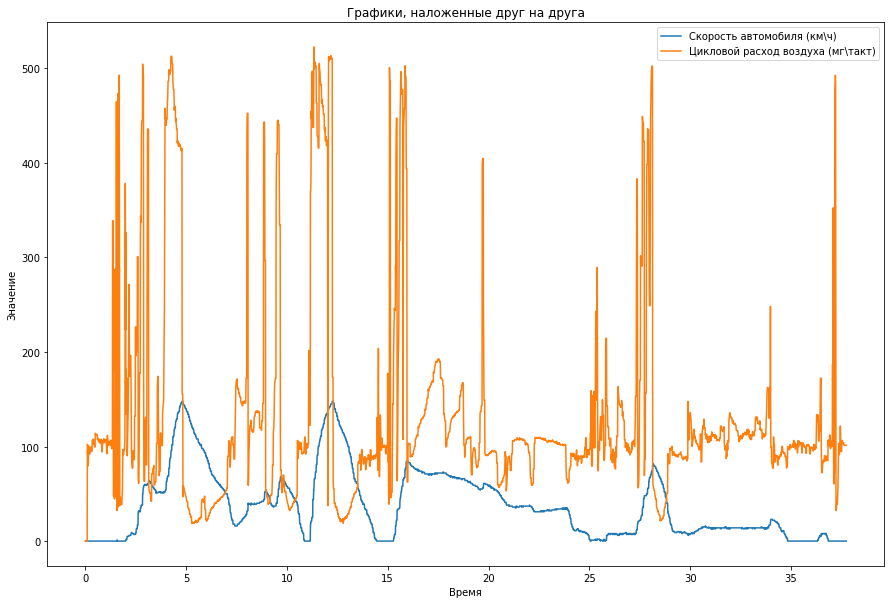

In [10]:
plt.figure(figsize=(15,10)) # задаем размер графика

plt.plot(data[x_col], data[col_10], label=col_10)
plt.plot(data[x_col], data[col_16], label=col_16)

plt.xlabel(x_col) # Название оси абсцисс
plt.ylabel("Значение") # Название оси ординат
plt.legend() # Отображение легенды
plt.title('Графики, наложенные друг на друга');

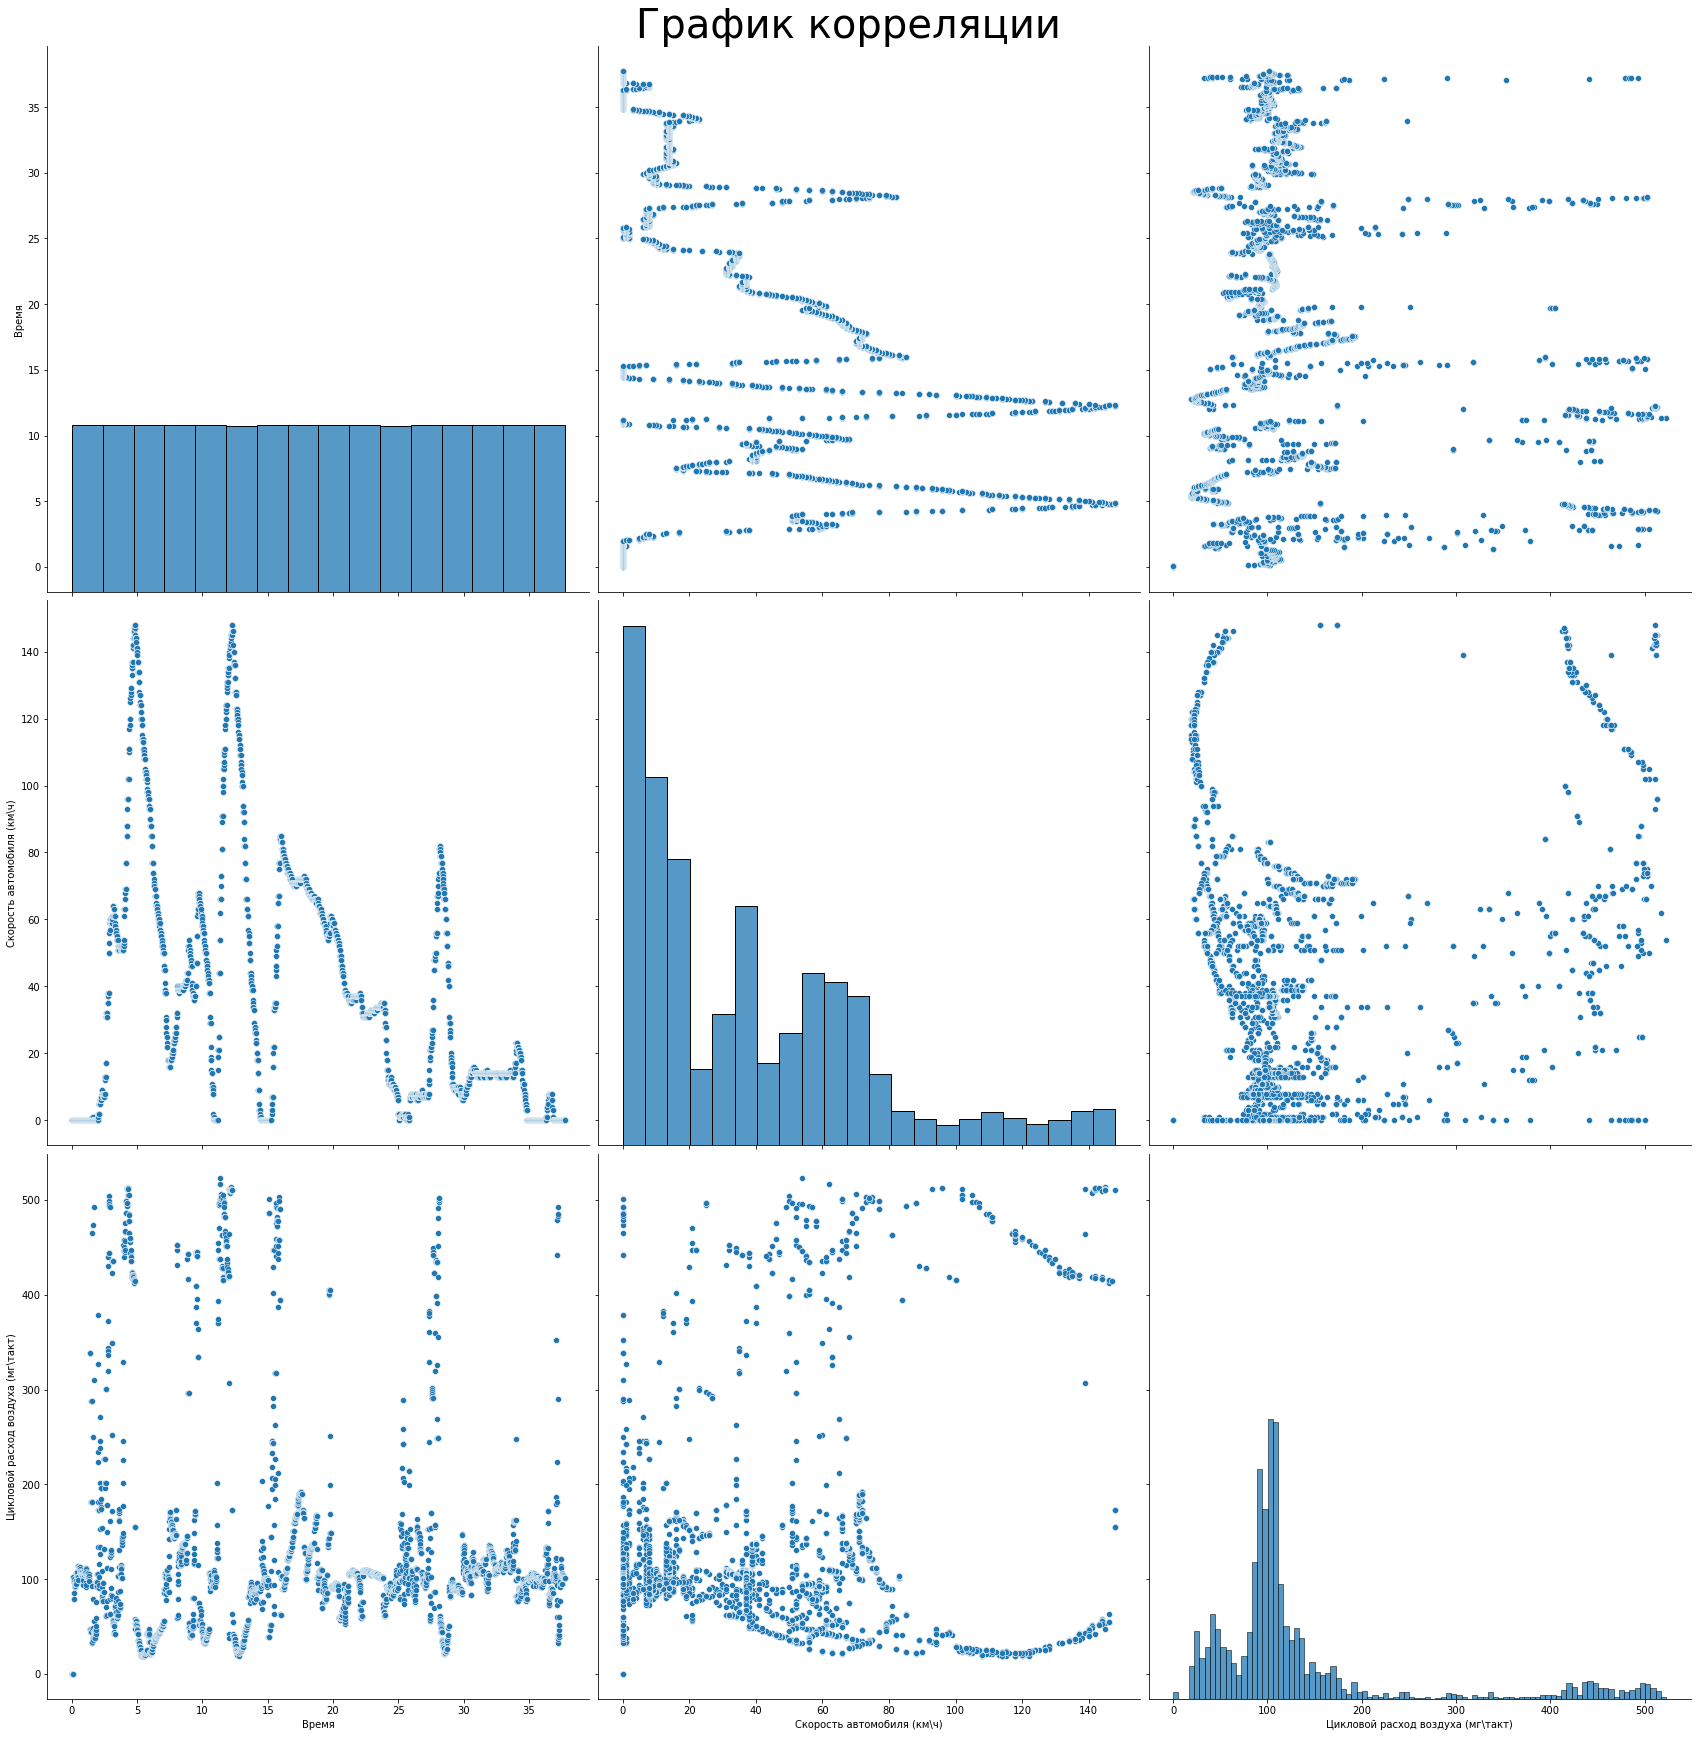

In [11]:
plot_sns = sns.pairplot(data[[x_col, col_10, col_16]], height=8)
plot_sns.fig.suptitle('График корреляции', y=1.01, fontsize=40)
sns.set_context("talk", font_scale=1.2); # увеличиваем все для читаемости

In [12]:
# Посчитаем корреляцию просто так
data[[x_col, col_10, col_16]].corr()

,Время,Скорость автомобиля (км\ч),Цикловой расход воздуха (мг\такт)
Время,1.000000,-0.420790,-0.143569
Скорость автомобиля (км\ч),-0.420790,1.000000,0.217819
Цикловой расход воздуха (мг\такт),-0.143569,0.217819,1.000000


# Задание 3. Постройте трёхмерный график согласно формуле из вашего варианта

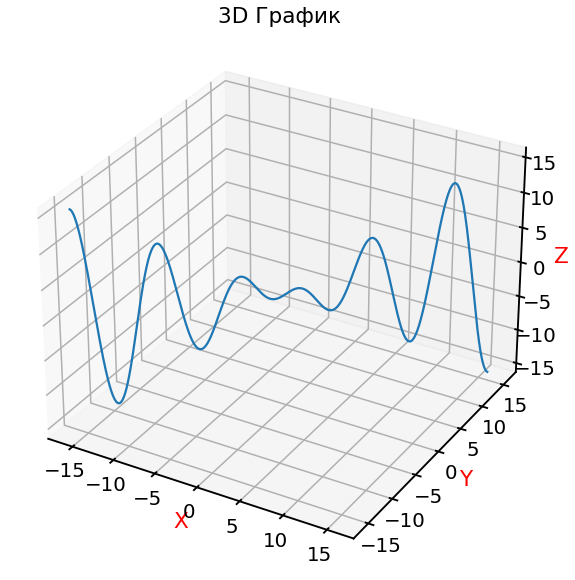

In [13]:
# кол-во значений, по которым будет строится график. Больше значение -> более гладкая картинка
SIZE = 10_000

# получаем X значения по варианту
x_lower = - 5 * np.pi
x_upper = 5 * np.pi
x_vals = np.linspace(x_lower, x_upper, SIZE)

# получаем Y значения по варианту
y_lower = - 5 * np.pi
y_upper = 5 * np.pi
y_vals = np.linspace(y_lower, y_upper, SIZE)

# получаем Z значения по варианту
z_vals = y_vals * np.cos(x_vals)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals)
plt.title('3D График')
ax.set_xlabel('X', color='red')
ax.set_ylabel('Y', color='red')
ax.set_zlabel('Z', color='red');